# Plot the stationary harmonic peaks found from the spectrograms of a geophone station

In [1]:
# Imports
from os.path import join

from utils_basic import SPECTROGRAM_DIR as indir
from utils_spec import assemble_spec_filename, read_geo_spectrograms, find_geo_station_spectral_peaks
from utils_plot import plot_geo_total_psd_and_peaks

In [2]:
# Inputs
# Data
range_type = "daily"
station = "A01"
day = "20200113"
window_length = 60.0
overlap = 0.0
downsample = False
downsample_factor = 60

# Finding peaks
power_threshold = 10.0
qf_threshold = 1000.0
freqmax = 50

# Plotting
dbmin = -20
dbmax = 10


In [3]:
# Read the spectrograms

# Full resolution
filename = assemble_spec_filename(range_type, "geo", day, station, window_length, overlap, downsample)
inpath = join(indir, range_type, filename)
stream_spec = read_geo_spectrograms(inpath)

# Downsampled
filename = assemble_spec_filename(range_type, "geo", day, station, window_length, overlap, downsample, downsample_factor = downsample_factor)
inpath = join(indir, range_type, filename)
stream_spec_ds = read_geo_spectrograms(inpath)

In [4]:
# Find the spectral peaks
peak_df, _ = find_geo_station_spectral_peaks(stream_spec, power_threshold = power_threshold, qf_threshold = qf_threshold, freqmax = freqmax)
print(f"In total, {len(peak_df)} spectral peaks found.")

In total, 5101 spectral peaks found.


In [5]:
# Compute the downsampled total PSD for plotting
trace_spec_total_ds = stream_spec_ds.get_total_power()

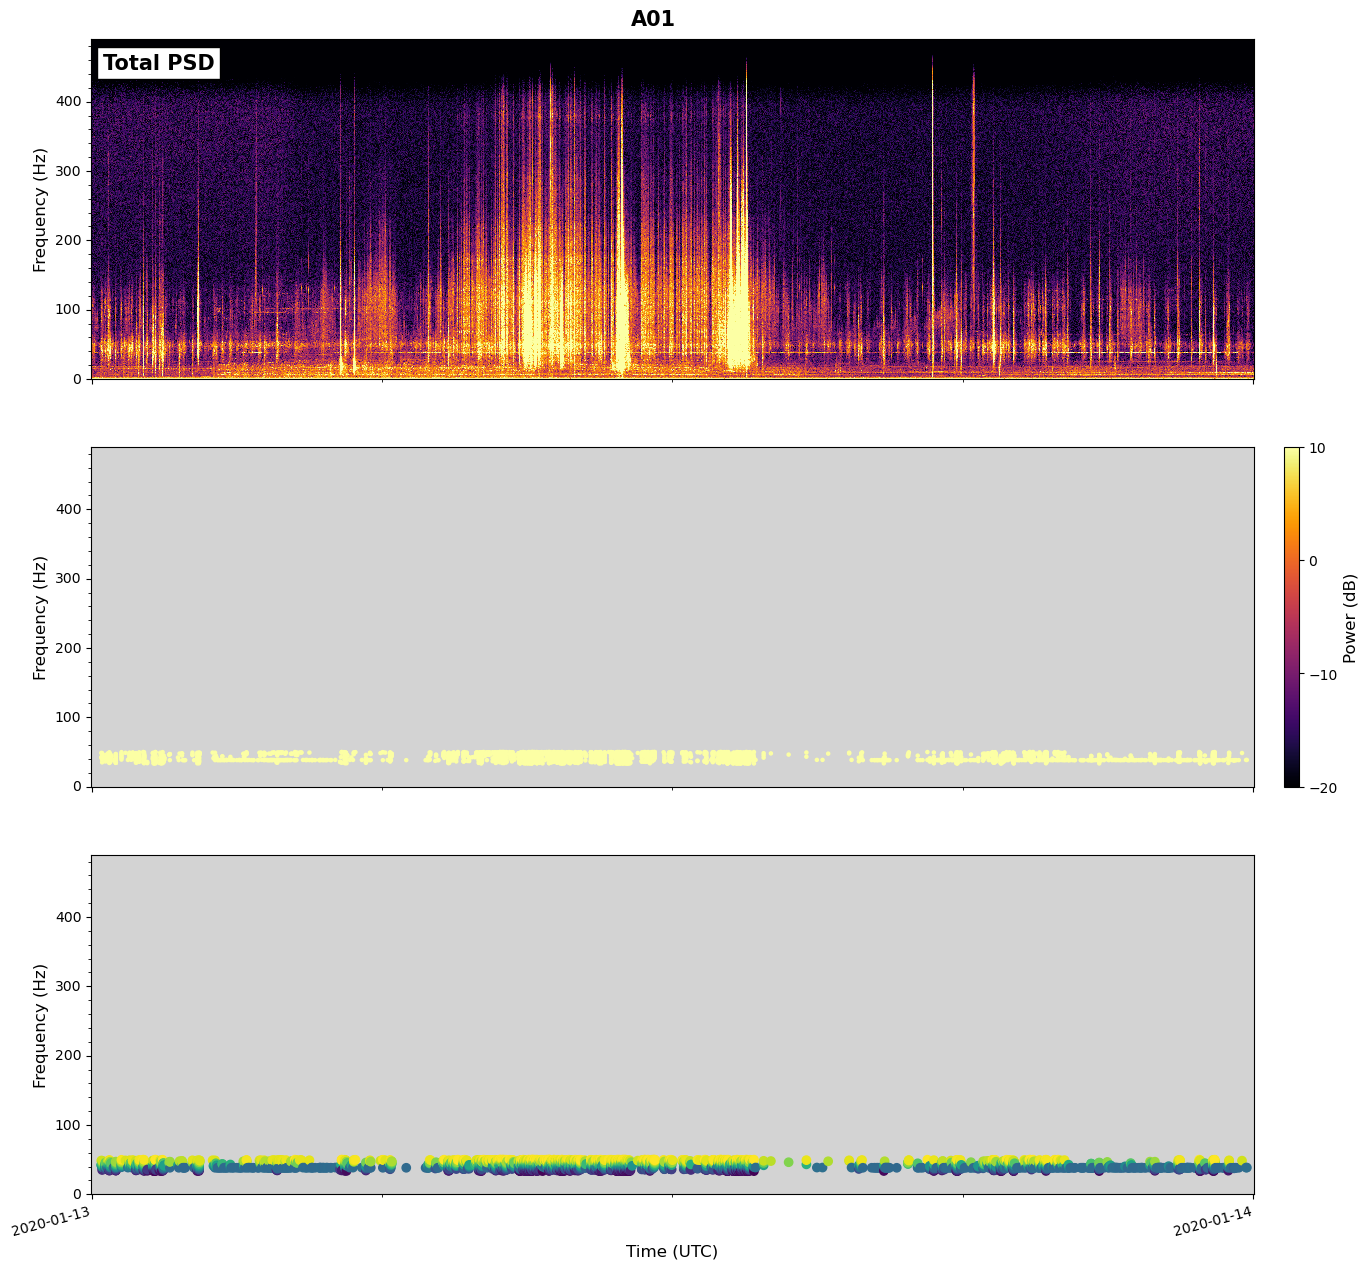

In [6]:
# Plot the peaks alongside the total power spectrogram
fig, axes = plot_geo_total_psd_and_peaks(trace_spec_total_ds, peak_df, dbmin = dbmin, dbmax = dbmax)